### Programming with data Mid-term assignment Law Yui Kwan 190318033

# Characteristics of successful kickstarter campaigns

## (a) Introduction:

Kickstarter, started in 2009, is one of the leading crowdfunding platform aiming to bring creative projects to life.[1] Compared with other platforms, Kickstarter is a product-oriented platform, pre-selling proposed products to "backers", who would pledge and pay before the products are launched. However, new fundraisers usually only know the qualitative characteristics successful campaigns should have, such as "having engaging multimedia promotion materials", "be futuristic" etc.

Quantitative characteristics that a successful campaign has, however, are not commonly known. For example, timeframe for delivery, country to launch/promote, product pricing and pledging options. These quantitative characteristics, though they can make or break a project, can only be vaguely guessed based on intuition, as statistics are not readily available.  

This research aims at producing these insights by identifying the key metrics of successful kickstarter campaigns, including demographics of backers, geolocations of the teams, product categories, timing of launch and available pledging options. As such, these insights could inform a potential fundraiser on campaign planning.

This research would focus on the kickstarter platform but not other crowdfunding platforms such as goFundMe, indiegogo.

## (b) Methodology, analysis and summary of findings:

###    1. Webscraping

Web scraping was used as a primary tool to collect data directly from Kickstarter. The first 200 pages of https://www.kickstarter.com/discover/advanced?sort=most_funded&page=1 are publicly available which contains 12 projects each, sorted by the amount funded. At each product page, the name, total count of backers, total amount, the currency, the target amount, the city of of the fundraiser, the product's category, the length of the funding period in days and the pledging options offered are noted. Then, the community page would be scraped for the top 10 backing countries and the count of new / returning backers of the project.

Primary data directly from Kickstarter is the most reliable source for this research, since it is where the data originated. According to the robots.txt [2] on the website, certain pages are not allowed to be scraped. The web scraper developed in this research would not be accessing forbidden pages. A 2 second sleep between each page is included to keep the webscraping unobstrutive to the normal traffic. Since the data are publicly available and are popular crowdfunded projects, there should not be any personal information required to be anonymised. It is possible that the insights derived from this data is biased towards the Kickstarter platform, since the research is only analysing there, and the demographic of the campaigns/backer would be majorly English-speaking as crowdfunders in other countries/languages may prefer other platforms. Kickstarter itself is an American website, which has a strong US user base and may distort the result towards the US.

There are other data sources for this purpose of research, available on Kaggle by Michael Mouille. [3] It is a wealthy dataset with over 300k projects collected in 2016 and 2018. However, this dataset is not deep enough to analyze for the questions posed in this research. For example, it lacks the demographics of backers and pledging options. There is another dataset by Web Robots [4]which crawled kickstarter and available in JSON, CSV format. While this data is also rich, the data directly scraped are more focused on successful campaigns which can answer our questions poised more easily.

The data collected via scraping placed no factors on when the campaign was. Thus, the analysis that based on it may not be timely as past successful campaigns may not perform as well if launched in the present.

### 2. Cleansing and analysis

After scraping, the content would be cleansed with the beautiful soup library and regex. The key data would be then extracted and saved to a SQLite database for further processing. SQLite database is a common lightweight database with easily accessible API to interact with Python, and the database itself is stored as a single .sqlite3 file that is easy to share.

The expected volume of the projects to be scraped was 12 projects * 200 pages = 2400 projects. However, there are a few problems encountered when scraping. The pages are in similar template when they are completed, and some were duplicated. Thus, when the webscraper encountered errors which represented anomalies, the URL would be stored in another table of error to be manually investigated. After discounting, 2363 unique projects that are attracted the most funds are available for analysis.

The below questions are posed to address the quantitative characteristics of the successful projects:

    1. Where should a product be launched in a particular category?
    2. Is there a correlation where the fundraising team is and where the backers are located?
    3. How early should the campaign be announced before the products could be shipped? How long should the funding period be?
    4. What is the average distribution of the pledging options of products in a particular category?

### 3. Summary of findings

Since Kickstarter is an American site, over 62% of the the backers come from the US, followed by the British backer. There are categories which backers from a certain country prefers, such as Animation in France. The fundraising team usually raise more funds in their home country, compared with global average. Thus, if a fundraiser wants to succeed in his campaign, he should be aware of the country preference and consider to start there, attracting more local audiences.

The funding period usually last 1 month but the delivery period can be longer. Tangible products usually deliver quicker than intangible products. Backers presume more risk on longer projects, as it is possible a tangible product goes beyond budget and eventually defaulted. Intangible product on the other hand enjoy longer delivery projects, as long as constant updates are given. Thus, for tangible products, kickstarter are more suitable as a promotional venue and production already lined up. For intangible products, backers can be beta users of the product and provide early funding.

Prices of the products remain in line with existing store-bought products, as backers do not seem to pay premiums for newer products. High-end products maybe hard to succeed on the kickstarter platform, and retail products that provide a niche edge over store-bought products may find huge success in terms of volume on the kickstarter platform.

## (c) Analysis Details

### 1. Where should a product be launched in a particular category?

In terms of absolute number, American backers dominates most of the categories, as Kickstarter is based in the US. However, it is remarkable that products in the categories of Journalism, Public Arts and Theater have most backers in the UK, France and Italy respectively. Nevertheless, the numbers in these categories are low. The UK has the secondmost backers in 45 categories, and Canada has the secondmost backers in 27 categories.

In [1]:
import sqlite3
import json
import operator
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', None)

conn = sqlite3.connect('ksdb.sqlite')
cur = conn.cursor()
cur.execute("SELECT category, countryBackerJSON FROM DetailsDB")
rows = cur.fetchall()

categories_raw_statistics = {}
categories_statistics = {}
categories_maxStatistics = {}


for row in rows:
    # initiate the categories
    if row[0] not in categories_raw_statistics:
        categories_raw_statistics[row[0]] = []
        categories_statistics[row[0]] = {}
    #  append the json     
    categories_raw_statistics[row[0]].append(json.loads(row[1]))

# Create a data variable in the format: {category: {country: backerCount}}
for category in categories_raw_statistics:
    country_statistics = {}
    for product in categories_raw_statistics[category]:
        for countryBacker in product:
            if countryBacker[0] not in country_statistics:
                country_statistics[countryBacker[0]] = 0
            country_statistics[countryBacker[0]] += int(countryBacker[1])
    categories_statistics[category] = country_statistics

df = pd.DataFrame(categories_statistics)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df)

Product Design  Tabletop Games  Animation  \
United States              2116821.0       2887951.0   116376.0   
United Kingdom              229766.0        430361.0    13269.0   
Germany                     167320.0        291608.0    12976.0   
Canada                      225291.0        347553.0    12618.0   
Australia                   181262.0        207827.0     8027.0   
Singapore                    92828.0          4892.0      501.0   
Japan                        58772.0          7754.0     2369.0   
Netherlands                  54540.0         59164.0      927.0   
France                       65738.0        244541.0    18078.0   
Spain                         7934.0        105631.0      248.0   
Mexico                         403.0            60.0        NaN   
Switzerland                  31285.0          1283.0     1075.0   
Sweden                       11670.0         55851.0     2061.0   
Malaysia                      4664.0             NaN        NaN   
Hong Kong                    23577.0             NaN       31.0   
Israel                        6860.0           204.0        NaN   
Italy                        11101.0         56774.0      171.0   
Thailand                      6874.0             4.0        NaN   
Russia                        3104.0            86.0       78.0   
Ireland                        319.0          1061.0      129.0   
Austria                       4526.0          1129.0      675.0   
Denmark                       7530.0         15635.0      991.0   
South Korea                   4626.0          2461.0      144.0   
Czech Republic                 952.0          2527.0        NaN   
Norway                        1751.0          1890.0      927.0   
Belgium                       2591.0         45924.0      543.0   
New Zealand                   2829.0          5730.0      913.0   
Colombia                        61.0             NaN        NaN   
Brazil                        2201.0          5116.0      160.0   
United Arab Emirates           251.0             2.0        NaN   
India                           18.0           344.0        NaN   
China                         1275.0           149.0      248.0   
Qatar                          186.0             NaN        NaN   
Philippines                    238.0             NaN        NaN   
Saudi Arabia                   131.0             NaN        NaN   
Chile                            4.0             NaN        NaN   
Barbados                         1.0             NaN        NaN   
Romania                         15.0             NaN        NaN   
Slovenia                       392.0             NaN        NaN   
Finland                        794.0           987.0        NaN   
Argentina                       65.0             NaN        NaN   
Estonia                         20.0             NaN        NaN   
Taiwan                         304.0             NaN      104.0   
Bahrain                          2.0             NaN        NaN   
Indonesia                       21.0             NaN        NaN   
Peru                             2.0             NaN        NaN   
Armenia                          2.0             NaN        NaN   
Costa Rica                       2.0             NaN        NaN   
Uruguay                         46.0             NaN        NaN   
Bermuda                          3.0             NaN        NaN   
Poland                          16.0         14940.0        NaN   
Hungary                          NaN            82.0        NaN   
Greece                           NaN            15.0        NaN   
Puerto Rico                      NaN             2.0        NaN   
Luxembourg                       NaN             NaN       20.0   
Portugal                         NaN             NaN        NaN   
Ukraine                          NaN             NaN        NaN   
Belarus                          NaN             NaN        NaN   
Croatia                          NaN             NaN        NaN   
So

In [2]:
# Prepare the results
# Categories that do not have the US as most backer country. format: {category: {country: backerCount}}
nonUSLedCategories = {}
# the most backer country after US per categories. format: {category: {country: backerCount}}
secondmostCountryCategories = {}

secondmostCountry = {}
    
for category in categories_statistics:
    categories_sorted = sorted(categories_statistics[category].items(), key=operator.itemgetter(1), reverse=True)
    if categories_sorted[0][0] != "United States":
        nonUSLedCategories[category] = {categories_sorted[0][0] : categories_sorted[0][1]}
        secondmostCountryCategories[category] = {categories_sorted[0][0] : categories_sorted[0][1]}
    else:
        secondmostCountryCategories[category] = {categories_sorted[1][0] : categories_sorted[1][1]}

s = pd.Series(nonUSLedCategories)
s

Journalism    {'United Kingdom': 1677}
Public Art            {'France': 4452}
Theater                 {'Italy': 251}
dtype: object

Second most backer countries


<AxesSubplot:>

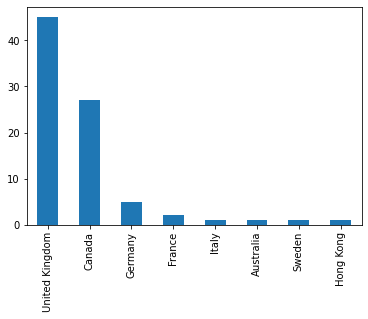

In [3]:
nonUSCountryCount = {}
for category in secondmostCountryCategories:
    for key in secondmostCountryCategories[category]:
        if key not in nonUSCountryCount:
            nonUSCountryCount[key] = 1
        else:
            nonUSCountryCount[key] += 1
print("Second most backer countries")    
s = pd.Series(nonUSCountryCount)
s = s.sort_values(ascending=False)
s.plot.bar()

Relatively, US backers accounted for more than 62% of all backers. Top 10 countries accounted for 94.5% backers of the surveyed projects. With a threshold of 3 percentage point higher than global average & minimum of 5000 backers, 8 countries showed relative preferences other than the US, UK & Germany. For example, Animation & Public Art in France and Gadgets in Japan are more popular.

United States     62.467664
United Kingdom     8.083445
Canada             6.835154
Germany            5.421482
Australia          4.728657
France             3.255087
Netherlands        1.360631
Japan              1.166068
Singapore          1.132578
dtype: float64
Top 10 Total:  94.45076619606976


<AxesSubplot:ylabel='None'>

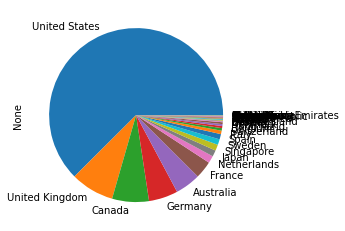

In [4]:
country_sum_backer = {}
for category in categories_statistics:
    for country in categories_statistics[category]:
        if country not in country_sum_backer:
            country_sum_backer[country] = 0
        country_sum_backer[country] += categories_statistics[category][country]

s = pd.Series(country_sum_backer)
s = s.sort_values(ascending = False)
percentage_country = (s / s.sum()) * 100
print(percentage_country[0:9])
print("Top 10 Total: ",percentage_country[0:9].sum())
percentage_country.plot.pie()

In [5]:
countryHigherThanAvg = {}
for category in categories_statistics:
    country_array = []
    category_percentage = pd.Series(categories_statistics[category]).sort_values(ascending = False)
    category_percentage = (category_percentage / category_percentage.sum()) * 100
    for country in category_percentage.keys():
        if(category_percentage[country] - percentage_country[country] > 3 and categories_statistics[category][country] > 1000):
            country_array.append(country)
    countryHigherThanAvg[category] = country_array
    
country_preference = {}

# {country: [category]}
for category, countryArray in countryHigherThanAvg.items():
    for country in countryArray:
        if country not in country_preference:
            country_preference[country] = [category]
        else:
            country_preference[country].append(category)

s = pd.Series(country_preference)
print(s)

France                                      [Animation, Public Art]
United States     [Fiction, Television, Narrative Film, Web, Foo...
Singapore                                                   [Sound]
Japan                                                     [Gadgets]
Germany           [Ready-to-wear, Footwear, Software, Photograph...
United Kingdom    [Space Exploration, Software, Journalism, Scie...
Austria                                                  [Footwear]
Hong Kong                                             [Documentary]
Netherlands                                              [Software]
Sweden                               [Illustration, Action, Comedy]
Australia                                                   [Drama]
dtype: object


In conclusion for whether is a geographic preference for a particular category, the answer is positive. While the most backers come from the US, it is worthwhile to attract backers from smaller sites, such as UK, Canada & Germany. If the category is of a country's particular interest, such as Animation and Public Art in France, it is also worthwhile to cater to that country's backers as well.

### 2. Is there a correlation where the fundraising team is and where the backers are located?

In general, backers are more tended to back the projects that are in the same country. This is more significant in projects outside of the US. Globally, American backers are 62.5%, but in projects where the fundraising team is in the US have, on average, 67.6% US backers. British projects have 20.2% british backers, while globally they only accounted for 8.1%. When there is potential language barrier, this divergence is more vivid. German backers are only 5.4% globally, but makes up of 33.7% in German projects. France has 25.8% vs 3.3%.

On smaller countries, this correlation persist. For example in Singapore and Japan, the national backer remain 10x more than global averages.

United States           0.675815
Germany                 0.336635
France                  0.258556
Australia               0.213757
United Kingdom          0.201910
Sweden                  0.167465
Canada                  0.123122
Czech Republic          0.111736
Switzerland             0.108486
Hong Kong               0.104746
Japan                   0.103670
India                   0.100321
Singapore               0.095326
Austria                 0.092685
Netherlands             0.080578
Spain                   0.075942
Croatia                 0.062464
Italy                   0.062316
Norway                  0.055115
Finland                 0.052998
Denmark                 0.052791
Chile                   0.041636
Russia                  0.038840
Colombia                0.038641
Israel                  0.035669
Poland                  0.034206
New Zealand             0.027964
Belgium                 0.026183
Taiwan                  0.025649
United Arab Emirates    0.020719
Indonesia 

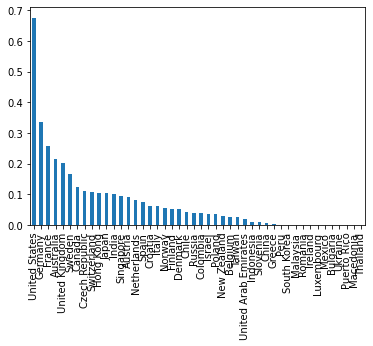

In [6]:
cur.execute('SELECT initCity, countryBackerJSON FROM DetailsDB')
rows = cur.fetchall()

states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC']
correlationList = []
countryBackerSum = {}
totalBackerSum = {}
averageBackerSum = {}

for row in rows:
    splitList = row[0].split(', ')
    country = splitList[-1]
    if country in states:
        country = 'United States'
    if country == "AU":
        country = "Australia"
    if country == "NZ":
        country = "New Zealand"
    if country == "UK":
        country = "United Kingdom"

    backerCountries = json.loads(row[1]) 
    countryBacker = 0
    totalBacker = 0

    for backerCountry in backerCountries:
        totalBacker += int(backerCountry[1])
        if backerCountry[0] == country:
            countryBacker = int(backerCountry[1])
            
    if country not in countryBackerSum:
        countryBackerSum[country] = countryBacker
    else:
        countryBackerSum[country] += countryBacker
        
    if country not in totalBackerSum:
        totalBackerSum[country] = totalBacker
    else:
        totalBackerSum[country] += totalBacker
        
for country in countryBackerSum:
    averageBackerSum[country] = countryBackerSum[country]/totalBackerSum[country]
        
s = pd.Series(averageBackerSum).sort_values(ascending = False)
s.plot.bar()
with pd.option_context('display.max_colwidth', None):
  print(s)

### 3. How early should the campaign be announced before the products could be shipped? How long should the funding period be?

A majority of the projects have around 30 days for their funding period. In the top six categories that have more than 100 projects, Tabletop games (mean = 25.5, std = 7.38) has less funding period than others. Backers for gadgets (mean = 41.3, std = 10.1) and hardwares (mean = 39.6, std = 10.4) usually have a longer funding period. 

However, funding period length does not correlate with delivery lead time. The most common delivery times for tabletop games is 1-2 year, with the most common pledging option at 335 days. For product design, it is 4-5 months and over 1 year for video games. Hardware and gadgets, on the other hand, have shorter lead time with usually 2-3  months and 4-5 lead months instead.

This represented the greater risks that backer perceives tangible deliverables and thus backing more with short delivery lead times. Intangible deliverables such as videogames, animations have over an year on delivery. Thus, fundraisers for tangible projects treat kickstarter more as a promotional channel where they can launch the products and promise a quick delivery, and intangible projects enjoys kickstarter community as early birds for their project's development.

In [7]:
cur.execute('SELECT currency, fundingPeriodDays, category, pledgeJSON FROM DetailsDB')
rows = cur.fetchall()

categoryFundingPeriod = {}

for row in rows:
    if row[2] not in categoryFundingPeriod:
        categoryFundingPeriod[row[2]] = [row[1]]
    else:
        categoryFundingPeriod[row[2]].append(row[1])

for category in categoryFundingPeriod:
    s = pd.Series(categoryFundingPeriod[category])
    if(s.count()>100):
        print(category)
        print(s.describe())
        print("\n")

Product Design
count    620.000000
mean      39.537097
std       11.097173
min        4.000000
25%       30.000000
50%       37.000000
75%       45.000000
max       75.000000
dtype: float64


Tabletop Games
count    648.000000
mean      25.506173
std        7.376387
min        5.000000
25%       21.000000
50%       25.000000
75%       30.000000
max       59.000000
dtype: float64


Video Games
count    116.000000
mean      32.551724
std        7.609313
min        7.000000
25%       30.000000
50%       30.000000
75%       33.000000
max       60.000000
dtype: float64


Gadgets
count    107.000000
mean      41.327103
std       10.081531
min       29.000000
25%       31.000000
50%       40.000000
75%       45.000000
max       60.000000
dtype: float64


Hardware
count    139.000000
mean      39.647482
std       10.436741
min       26.000000
25%       30.000000
50%       37.000000
75%       45.000000
max       60.000000
dtype: float64


Technology
count    102.000000
mean      36.215686
std  

In [8]:
cur.execute('SELECT category, pledgeJSON FROM DetailsDB')
rows = cur.fetchall()

categoryDeliveryPeriod = {}
for row in rows:
    if row[0] not in categoryDeliveryPeriod:
        categoryDeliveryPeriod[row[0]] = [json.loads(row[1])]
    else:
        categoryDeliveryPeriod[row[0]].append(json.loads(row[1]))
    
for category in categoryDeliveryPeriod:
    deliveryDistribution = {}
    for project in categoryDeliveryPeriod[category]:
        for pledge in project:
            if pledge['pledge_deliveryPeriod'] not in deliveryDistribution:
                deliveryDistribution[pledge['pledge_deliveryPeriod']] = pledge['pledge_backer']
            else:
                deliveryDistribution[pledge['pledge_deliveryPeriod']] += pledge['pledge_backer']
    deliveryDistributionGrouped = {"< 1 month": 0, "1-2 months": 0, "2-3 months":0, "3-4 months": 0, "4-5 months":0, "5-6 months":0, "6-7 months":0 ,"7-8 months":0, "8-9 months":0,"9-10 months":0,"10-11 months":0,"11-12 months":0, "1-2 years":0, "> 2 years":0}
    for days in deliveryDistribution:
        if(days < 28):
            deliveryDistributionGrouped["< 1 month"] += deliveryDistribution[days]
        elif(days < 62):
            deliveryDistributionGrouped["1-2 months"] += deliveryDistribution[days]
        elif(days < 93):
            deliveryDistributionGrouped["2-3 months"] += deliveryDistribution[days]
        elif(days < 124):
            deliveryDistributionGrouped["3-4 months"] += deliveryDistribution[days]
        elif(days < 155):
            deliveryDistributionGrouped["4-5 months"] += deliveryDistribution[days]
        elif(days < 186):
            deliveryDistributionGrouped["5-6 months"] += deliveryDistribution[days]
        elif(days < 217):
            deliveryDistributionGrouped["6-7 months"] += deliveryDistribution[days]
        elif(days < 248):
            deliveryDistributionGrouped["7-8 months"] += deliveryDistribution[days]
        elif(days < 279):
            deliveryDistributionGrouped["8-9 months"] += deliveryDistribution[days]
        elif(days < 310):
            deliveryDistributionGrouped["9-10 months"] += deliveryDistribution[days]
        elif(days < 341):
            deliveryDistributionGrouped["10-11 months"] += deliveryDistribution[days]
        elif(days < 367):
            deliveryDistributionGrouped["11-12 months"] += deliveryDistribution[days]
        elif(days < 732):
            deliveryDistributionGrouped["1-2 years"] += deliveryDistribution[days]
        else:
            deliveryDistributionGrouped["> 2 years"] += deliveryDistribution[days]
    deliveryDistributionGrouped = pd.Series(deliveryDistributionGrouped).sort_values(ascending = False)
    categoryDeliveryPeriod[category] = deliveryDistributionGrouped
    print(category)
    print("Days    Backers")
    print(categoryDeliveryPeriod[category][0:10])
    print("\n")

Product Design
Days    Backers
4-5 months    829220
3-4 months    782568
2-3 months    721627
5-6 months    572300
6-7 months    477002
1-2 months    382727
7-8 months    110474
8-9 months     64214
< 1 month      60642
1-2 years      35136
dtype: int64


Tabletop Games
Days    Backers
1-2 years       993314
8-9 months      749240
7-8 months      572326
6-7 months      515159
9-10 months     514264
10-11 months    468530
11-12 months    421128
4-5 months      333620
5-6 months      331934
3-4 months      145652
dtype: int64


Animation
Days    Backers
1-2 years       111119
11-12 months     24034
10-11 months     18895
2-3 months       12984
9-10 months       7509
5-6 months        6811
> 2 years         5520
6-7 months        5155
1-2 months        4046
< 1 month         2837
dtype: int64


Gaming Hardware
Days    Backers
3-4 months      58707
7-8 months      57751
4-5 months      18326
2-3 months      11653
1-2 months       6285
6-7 months       2190
8-9 months       1928
5-6 months 

dtype: int64


Accessories
Days    Backers
1-2 months      12057
4-5 months       7331
6-7 months       7098
3-4 months       4396
2-3 months        577
5-6 months        213
> 2 years           0
1-2 years           0
11-12 months        0
10-11 months        0
dtype: int64


Webcomics
Days    Backers
6-7 months    11031
4-5 months     7647
8-9 months     6114
3-4 months     1395
1-2 months     1327
< 1 month       940
5-6 months      137
7-8 months        6
> 2 years         0
1-2 years         0
dtype: int64


Drama
Days    Backers
2-3 months      3039
1-2 years       2863
1-2 months      2304
9-10 months      961
5-6 months       761
6-7 months       730
10-11 months     150
8-9 months         9
7-8 months         4
> 2 years          0
dtype: int64


Musical
Days    Backers
< 1 month       4403
8-9 months      4101
7-8 months      2174
1-2 years        370
> 2 years          0
11-12 months       0
10-11 months       0
9-10 months        0
6-7 months         0
5-6 months         0


### 4. What is the average distribution of the pledging options of products in a particular category?

Among the large categories, both Tabletop Games and Product Design has the almost equally popular backers in the USD10-50 and USD51-100 range. For Video Games, most backers are in the range of USD10-50. Globally, backers are most willingly to pay under USD100 on tangible deliverable projects and under USD50 on intangible deliverable objecs. Categories where backers are willing to pay more, are Robots, Camera Equipments, and 3D printing. These categories have the most popular basket at USD201-1000.

These pricing range are similar to products that are sold at stores. Thus, this is true even for those categories that are perceivably more advanced than current products such as technology, gaming hardware, wearables, 3D printing. Fundraisers should not deviate from current market prices even if the product might be superior, as backers do not prefer to pay premium on new products.

In [9]:
import urllib.request, urllib.parse, urllib.error, ssl
import json

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# read and save a exchange rate object
url = 'https://v6.exchangerate-api.com/v6/8fa652a99037427c5317177a/latest/USD'
html = urllib.request.urlopen(url, context=ctx).read()
response = json.loads(html.decode())
conversionRate = response['conversion_rates']

# an utility function to calculate exchange rate
def getExchangeRate(currencySymbol, conversionRate):
    if row[0] == "$":
        exchangeRate = conversionRate['USD']
    elif row[0] == "£":
        exchangeRate = conversionRate['GBP']
    elif row[0] == "¥":
        exchangeRate = conversionRate['JPY']
    elif row[0] == "€":
        exchangeRate = conversionRate['EUR']
    elif row[0] == "AU$ ":
        exchangeRate = conversionRate['AUD']
    elif row[0] == "CA$ ":
        exchangeRate = conversionRate['CAD']
    elif row[0] == "CHF ":
        exchangeRate = conversionRate['CHF']
    elif row[0] == "DKK ":
        exchangeRate = conversionRate['DKK']
    elif row[0] == "HK$ ":
        exchangeRate = conversionRate['HKD']
    elif row[0] == "MX$ ":
        exchangeRate = conversionRate['MXN']
    elif row[0] == "NOK ":
        exchangeRate = conversionRate['NOK']
    elif row[0] == "NZ$ ":
        exchangeRate = conversionRate['NZD']
    elif row[0] == "S$ ":
        exchangeRate = conversionRate['SGD']
    elif row[0] == "SEK":
        exchangeRate = conversionRate['KRW']
    else:
        exchangeRate = 1.0
    return exchangeRate

cur.execute('SELECT currency, fundingPeriodDays, category, pledgeJSON FROM DetailsDB')
rows = cur.fetchall()

categoryDeliveryPeriod = {}
for row in rows:
    pledgingInfo = json.loads(row[3])
    for pledgeOption in pledgingInfo:
        pledgeOption["currency"] = row[0]
        pledgeOption["exchangeRate"] = getExchangeRate(row[0], conversionRate)
    if row[2] not in categoryDeliveryPeriod:
        categoryDeliveryPeriod[row[2]] = [pledgingInfo]
    else:
        categoryDeliveryPeriod[row[2]].append(pledgingInfo)
    
for category in categoryDeliveryPeriod:
    pledgeDistribution = {}
    for project in categoryDeliveryPeriod[category]:
        for pledge in project:
            if pledge["pledge_option"] not in pledgeDistribution:
                pledgeDistribution[pledge["pledge_option"]] = pledge["pledge_backer"] / pledge["exchangeRate"]
            else:
                pledgeDistribution[pledge["pledge_option"]] += pledge["pledge_backer"] / pledge["exchangeRate"]
    pledgeDistributionGrouped = {"under 10":0, "10-50":0, "51-100":0, "101-150":0, "151-200":0, "201-1000":0, "1000 above":0}
    for pledgeOption in pledgeDistribution:
        if(pledgeOption < 10):
            pledgeDistributionGrouped["under 10"] += pledgeDistribution[pledgeOption]
        elif(pledgeOption <= 50):
            pledgeDistributionGrouped["10-50"] += pledgeDistribution[pledgeOption]
        elif(pledgeOption <= 100):
            pledgeDistributionGrouped["51-100"] += pledgeDistribution[pledgeOption]
        elif(pledgeOption <= 150):
            pledgeDistributionGrouped["101-150"] += pledgeDistribution[pledgeOption]
        elif(pledgeOption <= 200):
            pledgeDistributionGrouped["151-200"] += pledgeDistribution[pledgeOption]
        elif(pledgeOption <= 1000):
            pledgeDistributionGrouped["201-1000"] += pledgeDistribution[pledgeOption]
        else:
            pledgeDistributionGrouped["1000 above"] += pledgeDistribution[pledgeOption] 
    pledgeDistributionGrouped = pd.Series(pledgeDistributionGrouped).sort_values(ascending=False).astype("int64")
    categoryDeliveryPeriod[category] = pledgeDistributionGrouped
    print(category)
    print("Amount    Backers")
    print(categoryDeliveryPeriod[category][0:10])
    print("\n")

Product Design
Amount    Backers
10-50         1302758
51-100        1120125
101-150        545369
201-1000       532464
151-200        470791
under 10        63030
1000 above      21902
dtype: int64


Tabletop Games
Amount    Backers
51-100        1954646
10-50         1652247
101-150        886050
201-1000       494016
151-200        275650
under 10       218580
1000 above      19577
dtype: int64


Animation
Amount    Backers
10-50         98626
51-100        67965
201-1000      15766
151-200       10336
under 10       6860
101-150        5561
1000 above      211
dtype: int64


Gaming Hardware
Amount    Backers
51-100        86422
10-50         46507
201-1000      19142
101-150        8560
under 10        652
1000 above      459
151-200         362
dtype: int64


3D Printing
Amount    Backers
201-1000      53407
151-200       19594
51-100        17963
1000 above     9502
101-150        5916
under 10       3303
10-50          1252
dtype: int64


Fiction
Amount    Backers
201-1000     

Architecture
Amount    Backers
51-100        4095
10-50         3912
101-150       1607
201-1000       787
under 10       197
151-200        169
1000 above      60
dtype: int64


Illustration
Amount    Backers
10-50         16461
201-1000      13876
51-100         7747
101-150        3564
151-200        1307
1000 above       55
under 10         13
dtype: int64


Anthologies
Amount    Backers
51-100        3694
101-150        918
10-50          656
151-200        156
201-1000        62
under 10        62
1000 above       0
dtype: int64


Mobile Games
Amount    Backers
10-50         11666
51-100         1618
101-150         339
201-1000        239
under 10         42
1000 above       17
151-200           0
dtype: int64


Science Fiction
Amount    Backers
10-50         12896
51-100         5712
101-150        1003
201-1000        885
under 10        557
151-200         160
1000 above       94
dtype: int64


Playing Cards
Amount    Backers
10-50         35554
51-100         5714
101-150   

## (d) References and Appendices

### 1. References

    [1]: kickstarter.com, About, https://www.kickstarter.com/about
    [2]: kickstarter.com, robots.txt, https://www.kickstarter.com/robots.txt
    [3]: Mouille, Kickstarter Projects, https://www.kaggle.com/kemical/kickstarter-projects
    [4]: Web Robots, Kickstarter Datasets, https://webrobots.io/kickstarter-datasets/

### 2. Appendices

In [ ]:
# CollectURL.py
import urllib.request, urllib.parse, urllib.error, ssl
import sqlite3, re, time
from bs4 import BeautifulSoup

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Creating Table
conn = sqlite3.connect('ksdb.sqlite')
cur = conn.cursor()
cur.executescript('''
CREATE TABLE IF NOT EXISTS UrlDB (
    id      INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    projectURL     TEXT);
''')

# Only 200 Pages available to be crawled
startPage = int(1)
endPage = int(200)

for page in range(startPage, endPage + 1):
    url = "https://www.kickstarter.com/discover/advanced?state=successful&sort=most_funded"+"&page="+str(page)
    print("Start Retrieving", url)

    main_html = urllib.request.urlopen(url, context=ctx).read()
    main_data = main_html.decode()
    raw_soup = str(BeautifulSoup(main_data, 'html.parser'))
    rawProjURLList = re.findall("https://www.kickstarter.com/projects/.+/.+\"",raw_soup.replace("&quot;","\""))

    projURLList = []
    for rawProjURL in rawProjURLList:
        projURL = rawProjURL.split("\"")[0]
        if projURL == "https://www.kickstarter.com/projects/feed.atom":
            continue
        else:
            projURLList.append(projURL)
            cur.execute('''INSERT INTO UrlDB (projectURL) VALUES (:url)''', {"url": projURL} )
        
    conn.commit()
    time.sleep(2)

In [ ]:
# Webscraper.py
import urllib.request, urllib.parse, urllib.error, ssl
import sqlite3, re, time, json
from bs4 import BeautifulSoup
from datetime import datetime

conn = sqlite3.connect('ksdb.sqlite')
cur = conn.cursor()
cur.executescript('''
CREATE TABLE IF NOT EXISTS DetailsDB (
    id                  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    projID              INTEGER,
    name                TEXT,
    backerCount         INTEGER,
    amount              INTEGER,
    currency            TEXT,
    target              INTEGER,
    initCity            CITY,
    category            TEXT,
    fundingPeriodDays   INTEGER,
    pledgeJSON          TEXT,
    countryBackerJSON   TEXT,
    existingBackerCount INTEGER,
    newBackerCount      INTEGER,
    URL                 TEXT);
''')

cur.executescript('''
CREATE TABLE IF NOT EXISTS errorDB (
    id      INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    projID              INTEGER,
    errorURL                 TEXT);
''')

# a utility function to remove multiple strings
def removeAll(regexExpressionArray, text):
    for regexExpression in regexExpressionArray:
        text = re.sub(regexExpression,"",str(text))
    return text

# Obtain (1) Name
def getProjName(main_soup):
    rawText_name = main_soup.find("a",class_="hero__link")
    return removeAll(["<.*?>"],str(rawText_name))

# Obtain (2) amount, (3) currency backed and (4) total number of backer
def getCampaignStats(main_soup):
    rawText_totalBacked = main_soup.find("div",class_="NS_campaigns__spotlight_stats")
    rawText_totalBacked = removeAll(["<.*?>"," to help bring this project to life.",",","\n"],str(rawText_totalBacked))
    rawText_totalBacked = rawText_totalBacked.split(" backers pledged ")
    proj_backer_count = int(rawText_totalBacked[0])
    rawText_totalBacked = rawText_totalBacked[1]
    rawText_totalBacked = re.split('(\d+)',rawText_totalBacked)
    data_object = {
        "backerCount": proj_backer_count,
        "currency" : str(rawText_totalBacked[0]),
        "amount" : int(rawText_totalBacked[1]),
    }
    return data_object

# Obtain the (5) amount targeted
def getTargetAmount(main_soup):
    rawText_targetAmount = main_soup.find("div",class_="type-12 medium navy-500")
    rawText_targetAmount = removeAll(["<.*?>","\npledged of ","goal\n",","],str(rawText_targetAmount))
    rawText_targetAmount = re.split('(\d+)',rawText_targetAmount)
    return int(rawText_targetAmount[1])

# Obtain the (6) intiating city and (7) product category
def getCityCategory(main_soup):
    rawText_cityCategory = main_soup.find_all("a",class_="grey-dark mr3 nowrap type-12")
    data_object = {
        "city" : removeAll(["<.*?>","\n"],str(rawText_cityCategory[0])),
        "category" : removeAll(["<.*?>","\n"],str(rawText_cityCategory[1]))
    }
    return data_object

# Obtain the (8) length of funding period
def getFundingPeriodLength(main_soup):
    rawText_fundingPeriod = main_soup.find("div",class_="NS_campaigns__funding_period")
    rawText_fundingPeriod = removeAll(["<.*?>","\nFunding period\n"," days\)\n\n"],str(rawText_fundingPeriod))
    rawText_fundingPeriod = re.split(' - ',rawText_fundingPeriod)
    rawText_fundingPeriod = re.split('\n\(',rawText_fundingPeriod[1])
    return rawText_fundingPeriod[1]

# Obtain (9) all pledging options
def getPledgingOptions(main_soup):
    proj_pledgeOption = []
    rawTextList_pledgeOptions = main_soup.find_all("h2", class_= "pledge__amount")
    for rawText_pledgeOption in rawTextList_pledgeOptions:
        rawText_pledgeOption = removeAll(["<.*?>","\n","Pledge "," or more","About ",","],str(rawText_pledgeOption))
        proj_pledgeOptionList = re.split('(\d+)',rawText_pledgeOption)
        proj_pledgeOption.append(int(proj_pledgeOptionList[1]))

    proj_pledgeOptionBacker = []
    rawTextList_pledgeOptionBackers = main_soup.find_all("div", class_ = "pledge__backer-stats")
    for rawText_pledgeOptionBacker in rawTextList_pledgeOptionBackers:
        rawText_pledgeOptionBacker = removeAll(["<.*?>"," backers| backer",","],str(rawText_pledgeOptionBacker))
        proj_pledgeOptionBackerList = re.split('\n',rawText_pledgeOptionBacker)
        for i in range(0, len(proj_pledgeOptionBackerList)):
            if(proj_pledgeOptionBackerList[i].isdigit()):
                proj_pledgeOptionBacker.append(int(proj_pledgeOptionBackerList[i]))

    proj_pledgeDelivery = []
    rawText_fundingPeriod = main_soup.find("div",class_="NS_campaigns__funding_period")
    rawText_fundingPeriod = removeAll(["<.*?>","\nFunding period\n","\n"],str(rawText_fundingPeriod))
    rawText_fundingPeriodRange = re.split(' - ',rawText_fundingPeriod)
    proj_startFundingPeriod = rawText_fundingPeriodRange[0]
    proj_startFundingPeriod = datetime.strptime(proj_startFundingPeriod, '%b %d, %Y')
    proj_startFundingPeriod = proj_startFundingPeriod.date()

    rawTextList_deliveryEstimation = main_soup.find_all("time",class_="js-adjust-time")
    for rawText_deliveryEstimation in rawTextList_deliveryEstimation:
        rawText_deliveryEstimation = removeAll(["<.*?>"],str(rawText_deliveryEstimation))
        try:
            rawText_deliveryEstimation = datetime.strptime(rawText_deliveryEstimation, '%b %Y')
            rawText_deliveryEstimation = rawText_deliveryEstimation.date()
            proj_deliverEstimation = rawText_deliveryEstimation - proj_startFundingPeriod
            proj_pledgeDelivery.append(proj_deliverEstimation.days)
        except:
            continue

    result = []
    for i in range(0, len(proj_pledgeOption)):
        data_object = {
                "pledge_option": proj_pledgeOption[i],
                "pledge_backer": proj_pledgeOptionBacker[i],
                "pledge_deliveryPeriod": proj_pledgeDelivery[i]
            }
        result.append(data_object)
    return result

# Obtain the list of (10) Top countries where backers come from
def getTopCountries(community_soup):
    result = []
    rawText_topBackingCountries = community_soup.find("div",class_="location-list js-locations-countries")
    rawText_topBackingCountries = removeAll(["<.*?>",","], str(rawText_topBackingCountries))
    rawText_topBackingCountriesList = re.split(' backers | backer',rawText_topBackingCountries)
    for raw_Countries in rawText_topBackingCountriesList:
        raw_countryBackerAmount = re.split('[\n]+',raw_Countries)
        try:
            result.append((raw_countryBackerAmount[1], raw_countryBackerAmount[2]))
        except:
            pass
    return result

# Obtain the amount of (11) existing backer
def getExistingBacker(community_soup):
    rawText_existingBackers = community_soup.find("div",class_="existing-backers")
    rawText_existingBackers = removeAll(["<.*?>",","],str(rawText_existingBackers))
    rawText_existingBackers = re.split('(\d+)',rawText_existingBackers)
    try:
        proj_ExistingBacker = int(rawText_existingBackers[1])
    except:
        proj_ExistingBacker = 0
    return proj_ExistingBacker

# Obtain the amount of (12) new backers
def getNewBacker(community_soup):
    rawText_newBackers = community_soup.find("div",class_="new-backers")
    rawText_newBackers = removeAll(["<.*?>",","],str(rawText_newBackers))
    rawText_newBackers = re.split('(\d+)',rawText_newBackers)
    try:
        proj_newBacker = int(rawText_newBackers[1])
    except:
        proj_newBacker = 0
    return proj_newBacker

# Webscraping
def gatherDetails(projID, project_url):
    data_object = {}
    # try:
    main_html = urllib.request.urlopen(project_url, context=ctx).read()
    main_html = main_html.decode()
    main_soup = BeautifulSoup(main_html, 'html.parser')
    time.sleep(2)

    community_html = urllib.request.urlopen(project_url + "/community", context=ctx).read()
    community_html = community_html.decode()
    community_soup = BeautifulSoup(community_html, 'html.parser') 
    
    data_object = {
        "status": 1,
        "projID": projID,
        "name": getProjName(main_soup),
        "backerCount": getCampaignStats(main_soup)["backerCount"],
        "amount": getCampaignStats(main_soup)["amount"],
        "currency": getCampaignStats(main_soup)["currency"],
        "target": getTargetAmount(main_soup),
        "initCity": getCityCategory(main_soup)["city"],
        "category": getCityCategory(main_soup)["category"],
        "fundingPeriodDays": getFundingPeriodLength(main_soup),
        "pledgeJSON": json.dumps(getPledgingOptions(main_soup)),
        "countryBackerJSON": json.dumps(getTopCountries(community_soup)),
        "existingBackerCount": getExistingBacker(community_soup),
        "newBackerCount": getNewBacker(community_soup),
        "URL": project_url,
    }
    # except:
    #     data_object = {
    #         "status": 0,
    #         "projID": projID,
    #         "URL": project_url
    #     }
    return data_object

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Reading URLs to be retrieved
cur.execute("SELECT * FROM UrlDB")
urlrows = cur.fetchall()

# Adding a resume function - check if url has been matched
cur.execute("SELECT URL FROM DetailsDB")
readUrlRows = cur.fetchall()
readUrl = []
for readUrlRow in readUrlRows:
    readUrl.append(readUrlRow[0])

# Scrape and add to database
for urlrow in urlrows:
    project_url = urlrow[1]
    if(project_url not in readUrl):
        print("Start Retrieving - ", urlrow[0], " - ", project_url)
        data_object = gatherDetails(urlrow[0], project_url)
        if(data_object["status"] == 1):
            cur.execute("INSERT INTO DetailsDB (projID, name, backerCount, amount, currency, target, initCity, category, fundingPeriodDays, pledgeJSON, countryBackerJSON, existingBackerCount, newBackerCount, URL) VALUES (:projID, :name, :backerCount, :amount, :currency, :target, :initCity, :category, :fundingPeriodDays, :pledgeJSON, :countryBackerJSON, :existingBackerCount, :newBackerCount, :URL)", data_object)
        else:
            cur.execute("INSERT INTO errorDB (errorURL, projID) VALUES (:errorURL, :projID)", data_object)
        conn.commit()
        time.sleep(2)